# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.

**You must use quantitative visualizations (boxplots or histograms) when comparing quantitative features.  DO NOT categorize quantitative features.**

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('loan_data.csv')

df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,71,male,Associate,46817.176426,3,RENT,11567.737650,MEDICAL,10.351469,0.247083,5,806.869094,No,0
1,34,male,High School,79093.494008,17,OWN,9519.674498,MEDICAL,11.168902,0.120360,1,604.330171,No,0
2,80,male,Associate,67819.614431,20,OWN,16226.604002,PERSONAL,12.293112,0.239261,11,685.933579,No,0
3,40,female,Associate,49599.861220,0,RENT,15641.221708,VENTURE,10.327926,0.315348,14,629.190150,No,0
4,43,male,Doctorate,99833.900180,8,OWN,12727.942517,EDUCATION,9.338069,0.127491,16,638.298168,No,1


In [90]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,78,male,Associate,83625.682134,25,OWN,17962.746070,HOMEIMPROVEMENT,5.561095,0.214799,22,652.222868,No,0
44996,27,male,Associate,29606.127102,21,OWN,19442.209516,MEDICAL,8.098525,0.656695,8,620.191145,No,0
44997,21,male,Doctorate,52712.989853,15,MORTGAGE,8712.004271,PERSONAL,9.326687,0.165272,10,630.333185,No,0
44998,60,male,Associate,77755.389249,15,RENT,2688.617555,EDUCATION,7.803261,0.034578,19,706.510547,No,1
44999,75,female,Associate,45358.655557,7,MORTGAGE,4209.067143,HOMEIMPROVEMENT,13.746696,0.092795,25,492.098403,No,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  float64
 12  previous_loan_defaults_on_file  

In [92]:
approved_loans = df[df['loan_status'] == 1]

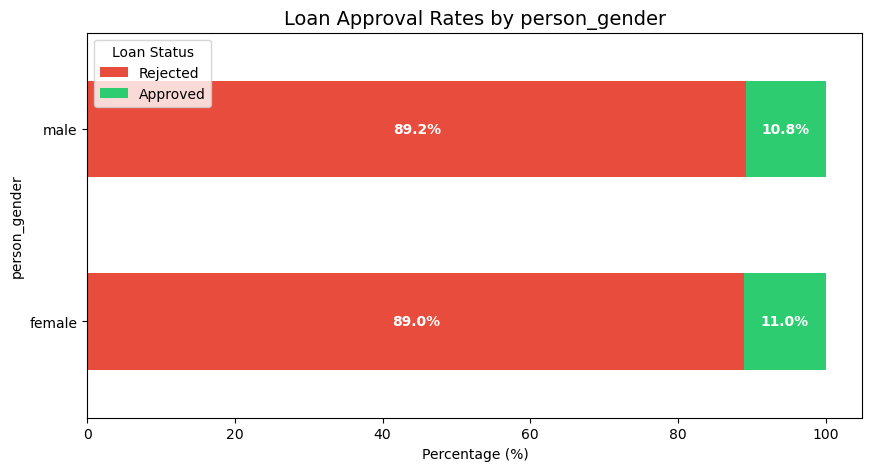

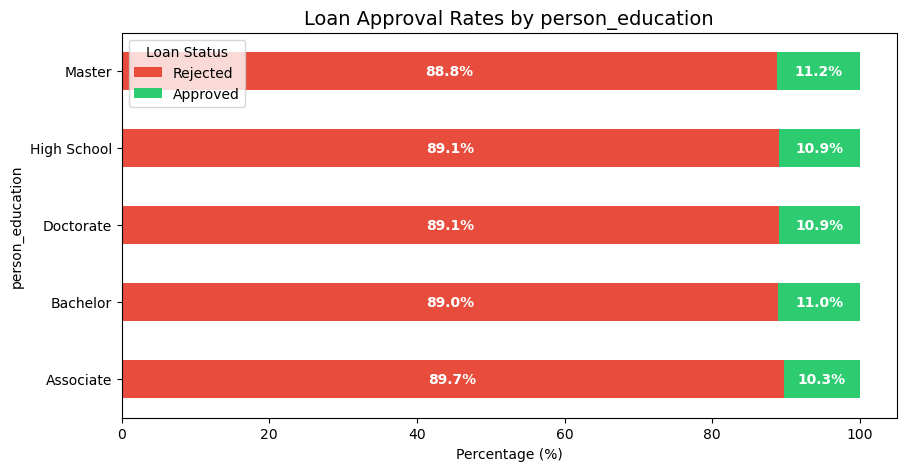

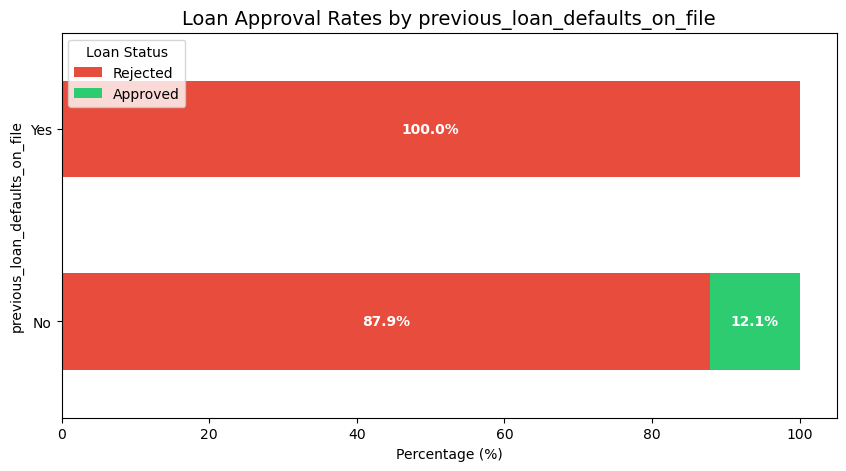

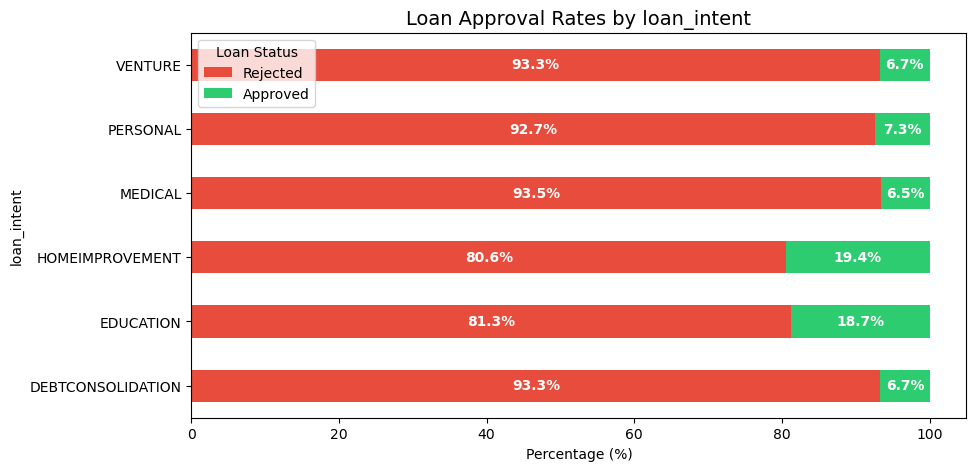

In [119]:
cat_features = ['person_gender', 'person_education', 'previous_loan_defaults_on_file', 'loan_intent']
quant_features = ['person_age', 'person_income', 'loan_percent_income', 'credit_score', 'loan_int_rate']

# Create a string column for Loan Status to make labels and coloring automatic
df['loan_status_label'] = df['loan_status'].replace({0: 'Rejected', 1: 'Approved'})

# Define specific color dictionary to ensure Rejected=Red, Approved=Green
custom_palette = {'Rejected': '#e74c3c', 'Approved': '#2ecc71'}
colors_list = ['#e74c3c', '#2ecc71'] # For the pandas bar charts

# ---------------------------------------------------------
# 2. CATEGORICAL VISUALIZATIONS (Horizontal Stacked Bars)
# ---------------------------------------------------------
for col in cat_features:
    # Create crosstab and normalize
    ct = pd.crosstab(df[col], df['loan_status'], normalize='index') * 100
    
    # Plot
    ax = ct.plot(kind='barh', stacked=True, figsize=(10, 5), color=colors_list)
    
    # Formatting
    plt.title(f'Loan Approval Rates by {col}', fontsize=14)
    plt.xlabel('Percentage (%)')
    plt.ylabel(col)
    plt.legend(title='Loan Status', labels=['Rejected', 'Approved'], loc='upper left')
    
    # Add percentage labels
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        if width > 0:
            ax.annotate(f'{width:.1f}%', 
                        (x + width / 2, y + height / 2), 
                        ha='center', va='center', color='white', fontweight='bold')
    
    plt.show()

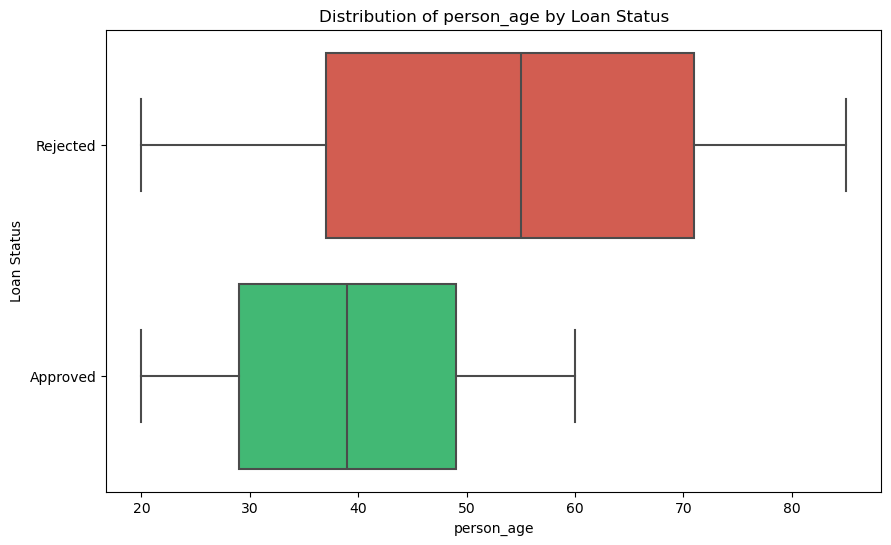

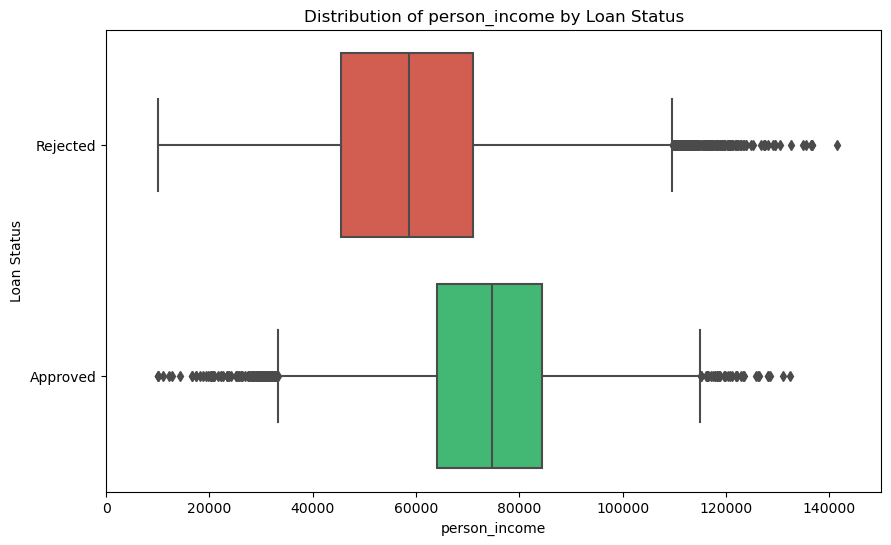

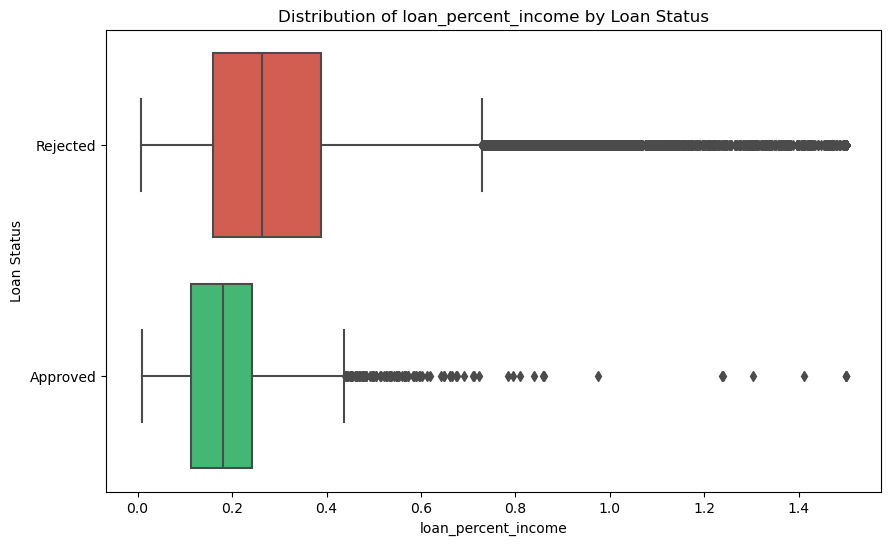

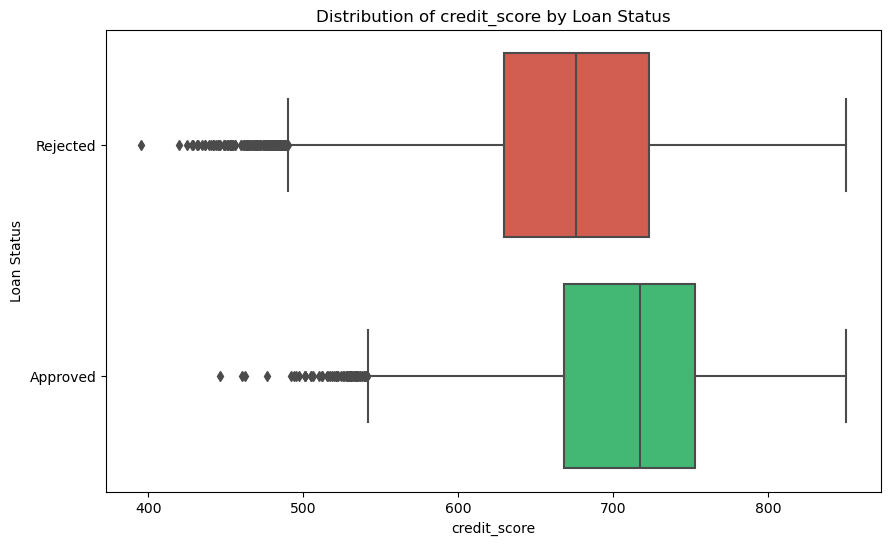

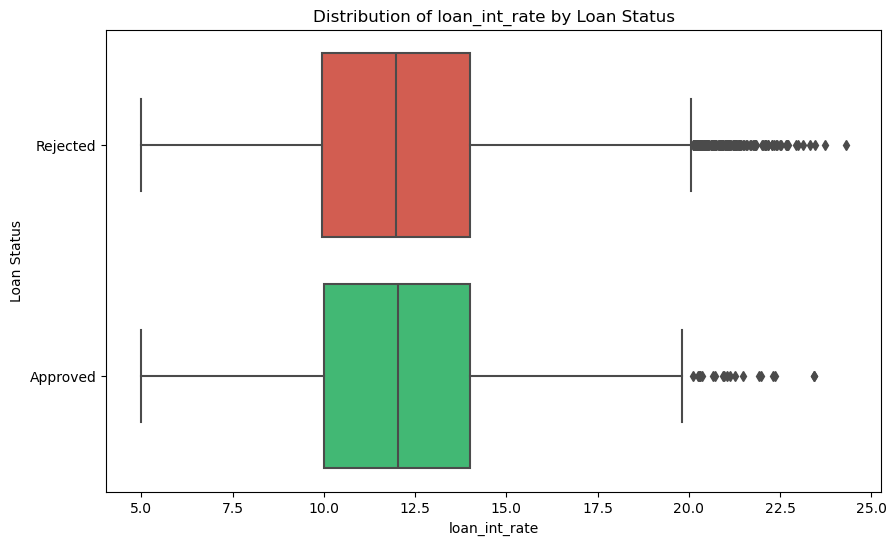

In [120]:
# ---------------------------------------------------------
# 3. QUANTITATIVE VISUALIZATIONS (Horizontal Colored Boxplots)
# ---------------------------------------------------------
for col in quant_features:
    plt.figure(figsize=(10, 6))
    
    # Use Seaborn for colored boxplots
    # y=grouping variable (categorical), x=quantitative variable
    sns.boxplot(
        data=df,
        x=col,
        y='loan_status_label',
        palette=custom_palette,
        orient='h'
    )
    
    plt.title(f'Distribution of {col} by Loan Status')
    plt.xlabel(col)
    plt.ylabel('Loan Status')
    
    # Optional: Adjust X-axis for Income to remove extreme outliers
    if col == 'person_income':
        plt.xlim(0, 150000)
        
    plt.show()

In [95]:
df['person_income'].describe()

count     45000.000000
mean      60158.033820
std       19849.803913
min       10000.000000
25%       46649.073063
50%       60200.760251
75%       73452.873880
max      141514.800793
Name: person_income, dtype: float64

In [96]:
high_income_rejects = df[(df['loan_status'] == 0) & (df['person_income'] > 70000)]
rejected_loans = df[(df['loan_status'] == 0)]

high_income_rejects.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,loan_status_label
1,34,male,High School,79093.494008,17,OWN,9519.674498,MEDICAL,11.168902,0.120360,1,604.330171,No,0,Rejected
5,22,male,Bachelor,70130.700025,6,MORTGAGE,9008.104188,VENTURE,12.575501,0.128447,22,770.974257,No,0,Rejected
8,21,male,Bachelor,77241.160427,25,RENT,17674.382881,DEBTCONSOLIDATION,14.211276,0.228821,22,653.042056,No,0,Rejected
11,21,male,Bachelor,77293.808882,7,RENT,9253.618435,PERSONAL,9.431558,0.119720,15,658.599725,Yes,0,Rejected
13,79,female,Doctorate,79501.532878,1,MORTGAGE,13746.349701,MEDICAL,12.893437,0.172907,18,763.650862,No,0,Rejected


In [97]:
accepted_loans = df[(df['loan_status'] == 1)]

accepted_loans.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,loan_status_label
4,43,male,Doctorate,99833.900180,8,OWN,12727.942517,EDUCATION,9.338069,0.127491,16,638.298168,No,1,Approved
6,41,female,Associate,86965.993882,11,OWN,23398.537788,EDUCATION,11.770607,0.269054,19,596.305523,No,1,Approved
9,49,male,Doctorate,57373.429325,4,OWN,14848.496412,PERSONAL,12.188035,0.258804,26,738.978230,No,1,Approved
32,26,male,Bachelor,63805.343945,13,OWN,13594.224627,DEBTCONSOLIDATION,11.654980,0.213058,24,735.913357,No,1,Approved
51,25,male,Doctorate,61930.287093,28,OWN,10462.727862,EDUCATION,11.929515,0.168944,21,850.000000,No,1,Approved


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


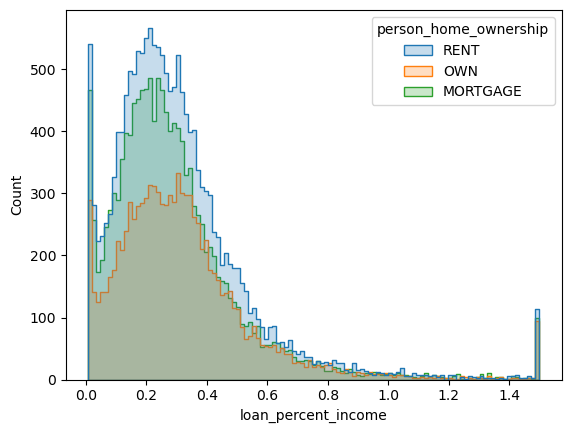

In [98]:
sns.histplot(x='loan_percent_income', hue='person_home_ownership', element='step', data=rejected_loans)

plt.show()

# Why did PHO=own get rejected?

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


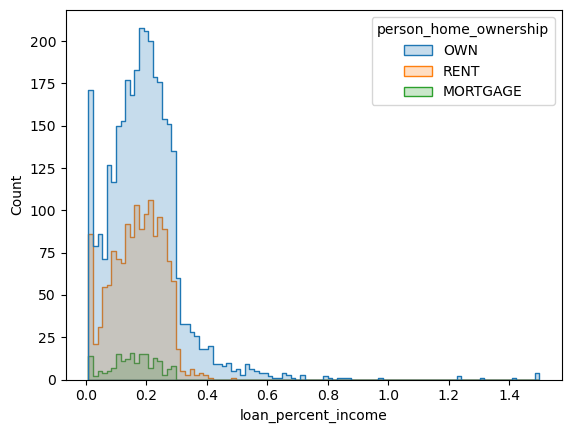

In [99]:
sns.histplot(x='loan_percent_income', hue='person_home_ownership', element='step', data=accepted_loans)

plt.show()

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


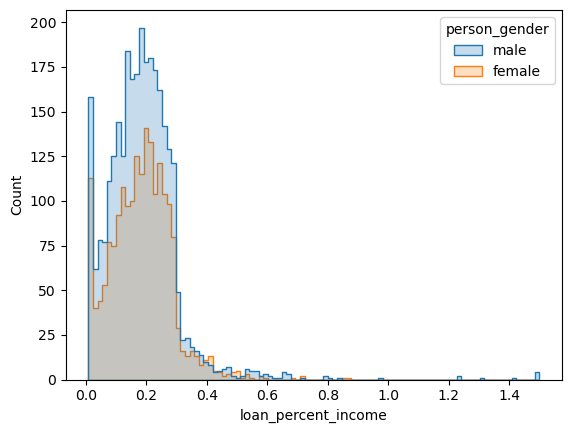

In [100]:
sns.histplot(x='loan_percent_income', hue='person_gender', element='step', data=accepted_loans)

plt.show()

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


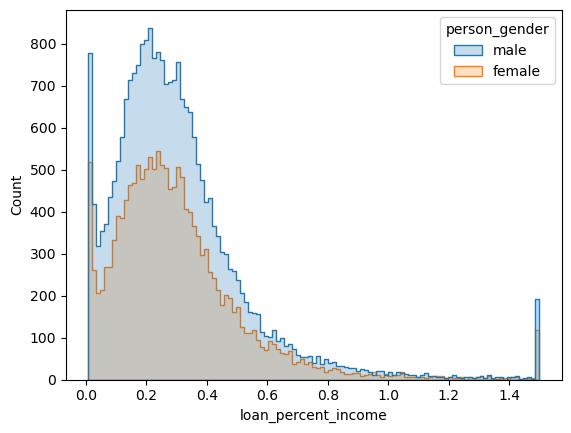

In [101]:
sns.histplot(x='loan_percent_income', hue='person_gender', element='step', data=rejected_loans)

plt.show()

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


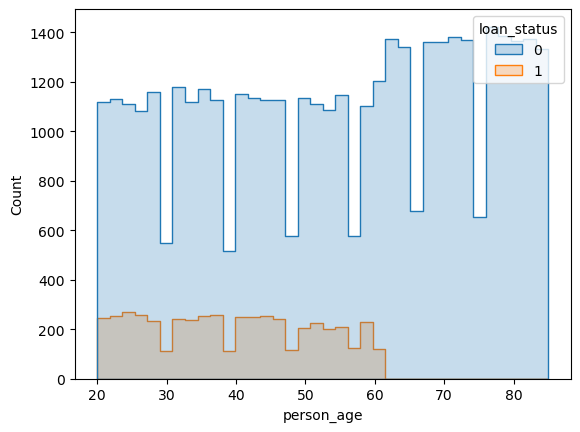

In [102]:
sns.histplot(x='person_age', hue='loan_status', element='step', data=df)

plt.show()

In [103]:
df.person_age.describe()

count    45000.000000
mean        52.440422
std         19.087414
min         20.000000
25%         36.000000
50%         52.000000
75%         69.000000
max         85.000000
Name: person_age, dtype: float64

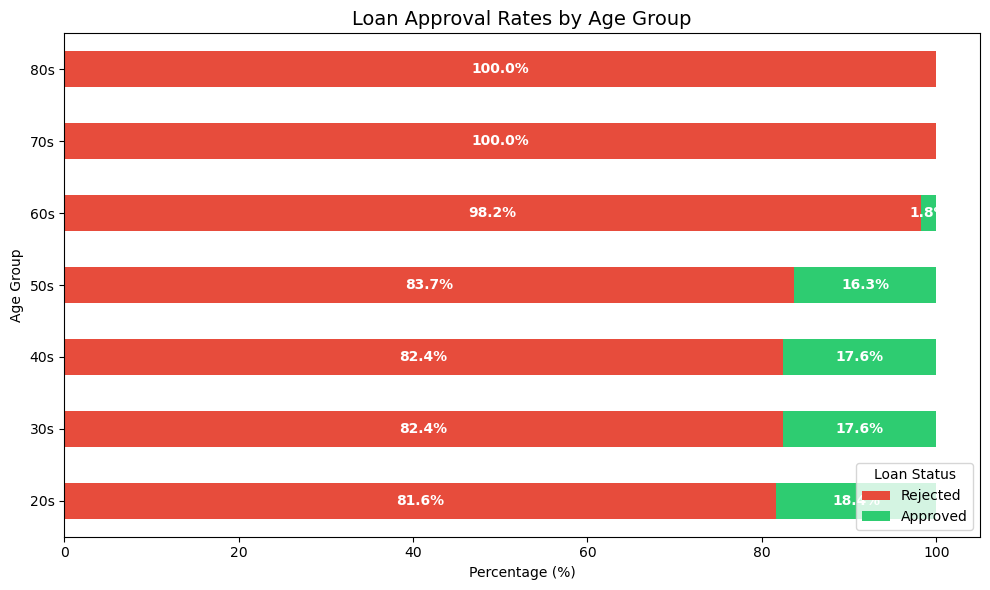

In [104]:
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s']

df['age_group'] = pd.cut(df['person_age'], bins=bins, labels=labels, right=False)

ct = pd.crosstab(df['age_group'], df['loan_status'], normalize='index') * 100

# Plot horizontal stacked bar chart
ax = ct.plot(kind='barh', 
             stacked=True, 
             figsize=(10, 6), 
             color=['#e74c3c', '#2ecc71']) # Red/Green

# Formatting
plt.title('Loan Approval Rates by Age Group', fontsize=14)
plt.xlabel('Percentage (%)')
plt.ylabel('Age Group')
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'], loc='lower right')

# Add percentage labels
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if width > 0:
        ax.annotate(f'{width:.1f}%', 
                    (x + width / 2, y + height / 2), 
                    ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

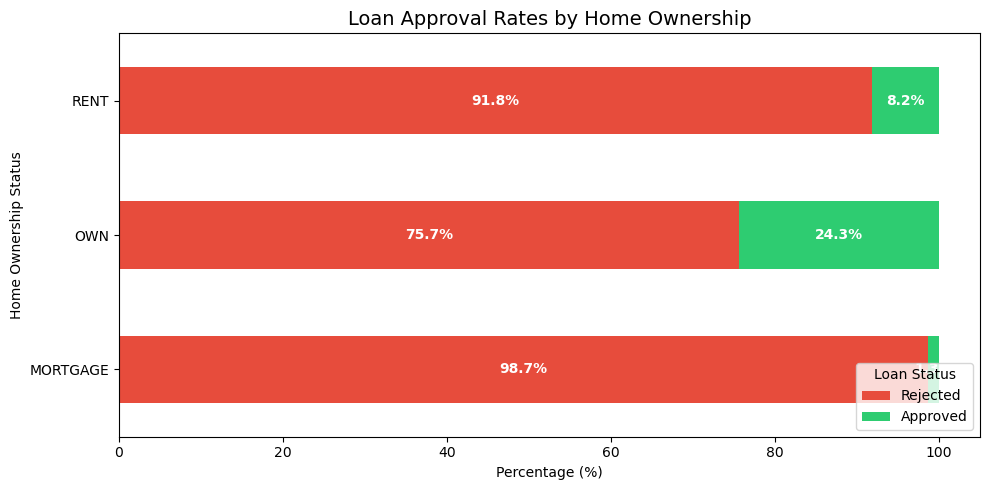

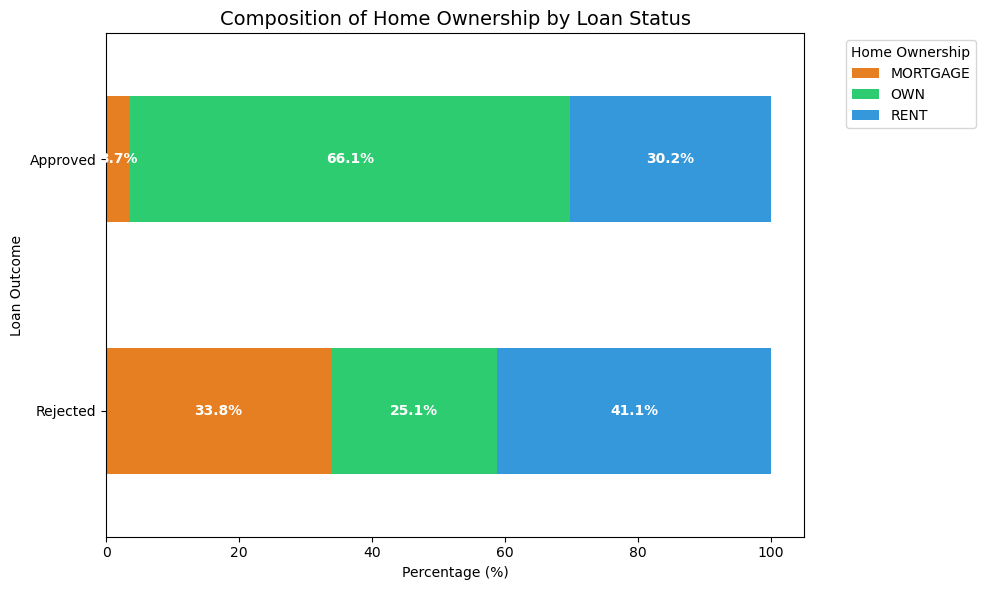

In [105]:
ct_home = pd.crosstab(df['person_home_ownership'], df['loan_status'], normalize='index') * 100

ax1 = ct_home.plot(kind='barh', stacked=True, figsize=(10, 5), color=['#e74c3c', '#2ecc71'])

plt.title('Loan Approval Rates by Home Ownership', fontsize=14)
plt.xlabel('Percentage (%)')
plt.ylabel('Home Ownership Status')
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'], loc='lower right')

# Add labels
for p in ax1.patches:
    width = p.get_width()
    if width > 0:
        ax1.annotate(f'{width:.1f}%', (p.get_x() + width/2, p.get_y() + p.get_height()/2),
                     ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


# 1. Create a crosstab: Rows=Loan Status, Columns=Home Ownership
# normalize='index' ensures each row sums to 100%
ct_home_comp = pd.crosstab(df['loan_status'], df['person_home_ownership'], normalize='index') * 100

# 2. Rename index for clarity
ct_home_comp.index = ['Rejected', 'Approved']

# 3. Plot
# We need a color for each ownership type (Rent, Mortgage, Own, Other).
# You can customize these. I'll use a standard distinct set.
# Common mapping: Rent (Blue), Mortgage (Orange), Own (Green), Other (Red)
colors = ['#e67e22', '#2ecc71', '#3498db', '#95a5a6'] 

ax = ct_home_comp.plot(kind='barh', 
                       stacked=True, 
                       figsize=(10, 6), 
                       color=colors)

# 4. Formatting
plt.title('Composition of Home Ownership by Loan Status', fontsize=14)
plt.xlabel('Percentage (%)')
plt.ylabel('Loan Outcome')
plt.legend(title='Home Ownership', bbox_to_anchor=(1.05, 1), loc='upper left')

# 5. Add percentage labels
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    # Only label if the segment is big enough to be readable (e.g., > 2%)
    if width > 2:
        ax.annotate(f'{width:.1f}%', 
                    (x + width / 2, y + height / 2), 
                    ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

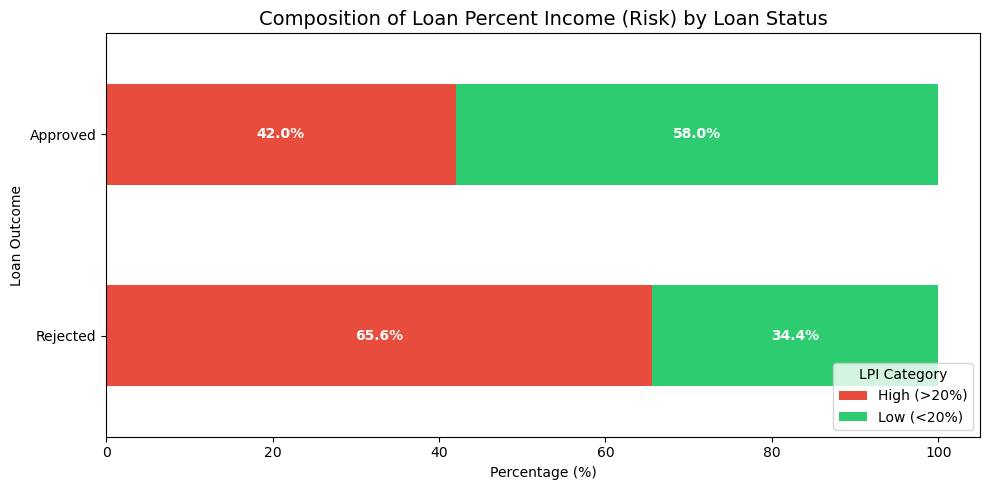

In [106]:
# ---------------------------------------------------------
# Loan Percent Income Composition (Accept vs Reject)
# ---------------------------------------------------------

# 1. Create the LPI Category column
df['LPI_Category'] = np.where(df['loan_percent_income'] > 0.20, 'High (>20%)', 'Low (<20%)')

# 2. Create a crosstab that groups by Loan Status (Rows) vs LPI Category (Columns)
# normalize='index' ensures each row (Approved/Rejected) sums to 100%
ct_composition = pd.crosstab(df['loan_status'], df['LPI_Category'], normalize='index') * 100

# 3. Rename index for clarity in the plot
ct_composition.index = ['Rejected', 'Approved']

# 4. Plot
# We use Green for Low LPI (Good) and Red for High LPI (Risky)
# Note: Check column order. If 'High' is first alphabetically, it gets color #1 (Red).
# If columns are ['High (>20%)', 'Low (<20%)'], then High=Red, Low=Green.
# If they are different, we might need to reorder or map specifically. 
# Let's force the column order to ensure colors match the meaning.
ct_composition = ct_composition[['High (>20%)', 'Low (<20%)']]
ax = ct_composition.plot(kind='barh', stacked=True, figsize=(10, 5), color=['#e74c3c', '#2ecc71'])


# 5. Formatting
plt.title('Composition of Loan Percent Income (Risk) by Loan Status', fontsize=14)
plt.xlabel('Percentage (%)')
plt.ylabel('Loan Outcome')
plt.legend(title='LPI Category', labels=['High (>20%)', 'Low (<20%)'], loc='lower right')

# 6. Add labels
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if width > 0:
        ax.annotate(f'{width:.1f}%', 
                    (x + width / 2, y + height / 2), 
                    ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

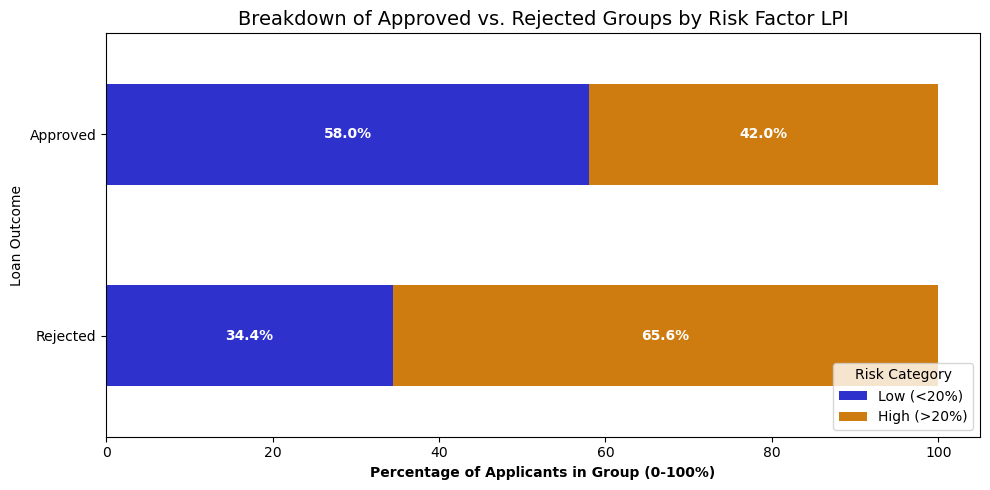

In [112]:
# 1. Create the LPI Category column
df['LPI_Category'] = np.where(df['loan_percent_income'] > 0.20, 'High (>20%)', 'Low (<20%)')

# 2. Create Crosstab: Group by Status (Rows), Split by Risk (Cols)
ct_composition = pd.crosstab(df['loan_status'], df['LPI_Category'], normalize='index') * 100
ct_composition.index = ['Rejected', 'Approved']

# This way, the Green bar starts at 0, and the Red bar stacks on top.
ct_composition = ct_composition[['Low (<20%)', 'High (>20%)']]

# 4. Plot
ax = ct_composition.plot(kind='barh', 
                         stacked=True, 
                         figsize=(10, 5), 
                         color=["#2e31cc", "#ce7b10"])

# 5. CORRECTED LABELS
plt.title('Breakdown of Approved vs. Rejected Groups by Risk Factor LPI', fontsize=14)
plt.xlabel('Percentage of Applicants in Group (0-100%)', fontweight='bold') # <-- Explicit Label
plt.ylabel('Loan Outcome')
plt.legend(title='Risk Category', loc='lower right')

# 6. Add labels
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if width > 0:
        ax.annotate(f'{width:.1f}%', 
                    (x + width / 2, y + height / 2), 
                    ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

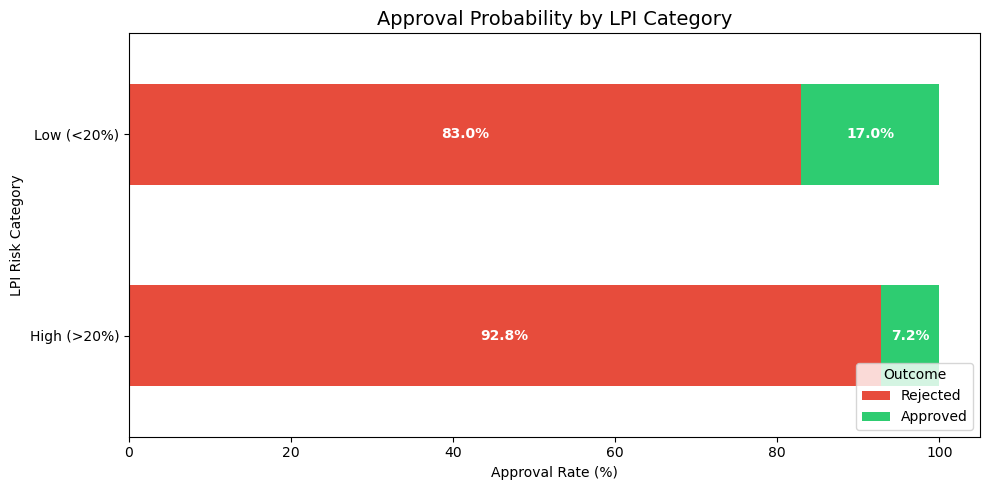

In [108]:
# Create the category
df['LPI_Category'] = np.where(df['loan_percent_income'] > 0.20, 'High (>20%)', 'Low (<20%)')

# FLIP THE CROSSTAB
# Group by Category (Rows) and look at Status (Columns)
ct_rate = pd.crosstab(df['LPI_Category'], df['loan_status'], normalize='index') * 100

# Plot
ax = ct_rate.plot(kind='barh', 
                  stacked=True, 
                  figsize=(10, 5), 
                  color=['#e74c3c', '#2ecc71']) # Red=Rejected, Green=Approved

plt.title('Approval Probability by LPI Category', fontsize=14)
plt.xlabel('Approval Rate (%)')
plt.ylabel('LPI Risk Category')
plt.legend(title='Outcome', labels=['Rejected', 'Approved'], loc='lower right')

# Add labels
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.annotate(f'{width:.1f}%', (p.get_x() + width/2, p.get_y() + p.get_height()/2),
                     ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

In [109]:
df['loan_percent_income'].describe()

count    45000.000000
mean         0.292622
std          0.222389
min          0.007935
25%          0.153062
50%          0.249120
75%          0.371060
max          1.500000
Name: loan_percent_income, dtype: float64

In [110]:
accepted_loans['loan_percent_income'].describe()

count    4893.000000
mean        0.184616
std         0.113232
min         0.008311
25%         0.113145
50%         0.181438
75%         0.243240
max         1.500000
Name: loan_percent_income, dtype: float64

In [111]:
rejected_loans['loan_percent_income'].describe()

count    40107.000000
mean         0.305799
std          0.228757
min          0.007935
25%          0.160467
50%          0.263221
75%          0.387834
max          1.500000
Name: loan_percent_income, dtype: float64

# person_age: 60+ Generaly always rejected
Lawsuit potential! Is every single rejected 60+ year old applicant's request worthy of a valid non-descriminated rejection?

# person_gender: 11% for both
Almost exactly even approval rating when analyzed without other factors aggregated. IE: gender + high LPI might show a descrimination 

# person_education: all close to same approval rating
Acceptance were all close to 10% and rejected were all around 90% when analyzed without other factors aggregated.

# person_income: >70,000 likely accepted
More personal income you have generaly shows a slight increase to your application being approved.

# person_emp_exp: Didn't even check

# person_home_ownership: Owning results in approval
The data shows that there is a moderate correlation to homeowners having higher approval rating.

# loan_amnt: Didn't check

# loan_intent: Education and HomeImprovement get approved
The other catagories of loan intent were roughly even in approval rating, but these 2 showed an determinate increase in approval.

# loan_int_rate: Even
The approval and rejected box plot look almost mirrored with how even these were.

# loan_percent_income: Low LPI shows increased approval
Having <20% LPI on your application is generally likely to increase your approval rating.

# cb_person_cred_hist_length: Didn't seem relevant
Needs much further analysis to be conclusive though.

# credit_score: <700 generaly likely to be rejected
Pretty standard display that having bad credit is likely to hurt your approval rating.

# previous_loan_defaults_on_file: Garunteed rejection
100% rejection rate if you defaulted on a previous loan. legal I have no idea.

# loan_status: (Target Variable)


This institution should expect litigation expeditiously! Solely due to elder applicants having high if not garunteed rejection rates it is highly likely that they could be sued for discrimination. I don't know if there is protections against renting or mortgaging a home rather than owning, but that also seems like a clear predesignation to getting accepted or rejected for a loan by this company.
